# Homework 03

## Matt Briskey

### 1. Load the Given data set fruit.csv, which contains the samples of fruit's mass, height, and name.

https://raw.githubusercontent.com/franklin-univ-data-science/data/master/fruit.csv

columns:

fruit name: mandarin, apple, lemon
mass
height

In [1]:
# Import pandas and load the olympics.csv.
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/fruit.csv')

In [2]:
df.head(10) # Show the first 10 rows

,fruit_name,mass,height
0,lemon,116,7.9
1,lemon,116,8.5
2,lemon,116,8.0
3,lemon,116,8.1
4,lemon,118,8.0
5,lemon,118,8.1
6,lemon,120,8.4
7,lemon,130,8.2
8,lemon,132,8.7
9,lemon,152,9.0


In [3]:
df['fruit_name'].value_counts() # Get a count of each fruit in the dataframe

apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [4]:
print('Row count is:', len(df)) # print the number of rows

Row count is: 40


### 2. Define the features as mass and height, and the target as the variable "isLemon", which is derived by yourself (if fruit is lemon then 1 else -1). Print the feature matrix and target vector, respectively.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# define feature matrix X
X = df.iloc[0:40, [1, 2]].values # extract the columns of mass and height

print("Feature Matrix:")
X # print the feature vector which shows mass and height

Feature Matrix:


array([[116. ,   7.9],
       [116. ,   8.5],
       [116. ,   8. ],
       [116. ,   8.1],
       [118. ,   8. ],
       [118. ,   8.1],
       [120. ,   8.4],
       [130. ,   8.2],
       [132. ,   8.7],
       [152. ,   9. ],
       [174. ,  10.1],
       [186. ,   9.2],
       [194. ,  10.3],
       [196. ,   9.7],
       [200. ,  10.5],
       [216. ,  10.2],
       [140. ,   7.1],
       [152. ,   7.3],
       [154. ,   7.1],
       [156. ,   7.1],
       [156. ,   7.5],
       [156. ,   7.4],
       [160. ,   7.5],
       [162. ,   7.1],
       [162. ,   7.2],
       [164. ,   7.7],
       [166. ,   7.3],
       [168. ,   7.6],
       [170. ,   7.9],
       [172. ,   7. ],
       [172. ,   7.6],
       [176. ,   7.2],
       [178. ,   7.8],
       [180. ,   6.8],
       [192. ,   7.3],
       [ 76. ,   4. ],
       [ 80. ,   4.3],
       [ 80. ,   4.3],
       [ 84. ,   4.6],
       [ 86. ,   4.7]])

In [6]:
# define target vector isLemon
isLemon = df.iloc[0:40, 0].values # select the label column in first 100 instances, which have setosa and versicolor

isLemon = np.where(isLemon == 'lemon', 1, -1) # define the target (isLemon as 1, notLemon as 1)

print("Target Vector:")
isLemon # print the target vector

Target Vector:


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1])

### 3. Draw a scatter plot of the binary classification (isLemon) by two features (mass, height).

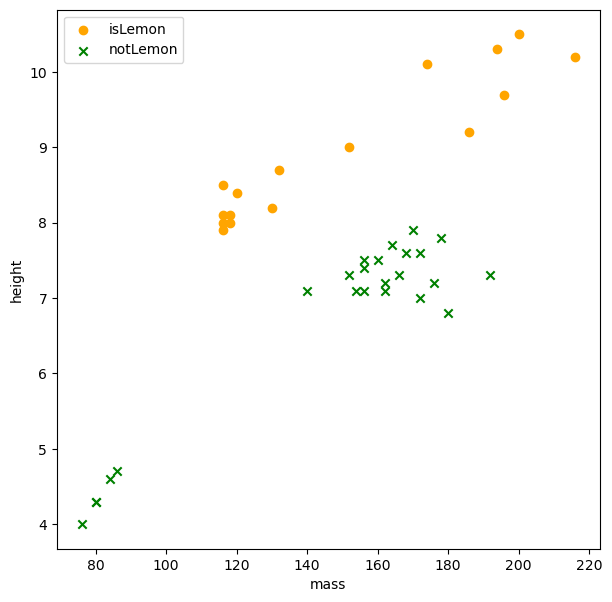

In [7]:
# Make the plot a little larger
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)

# plot data
plt.scatter(X[:16, 0], X[:16, 1],
            color='orange', marker='o', label='isLemon')
plt.scatter(X[16:40, 0], X[16:40, 1],
            color='green', marker='x', label='notLemon')

plt.xlabel('mass')
plt.ylabel('height')
plt.legend(loc='upper left')


plt.show()

4. ### Add x0 vector to the feature matrix X. Apply the perceptron algorithm to predict the classification (isLemon). What is the smallest number of misclassified samples you can get? (hint: try a very large number of epoch because the optimization of our current perceptron method is not efficient)

In [8]:
#define the Perceptron interface as a class
class Perceptron():
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        #initialize the weights
        rgen = np.random.RandomState(self.random_state)      #rgen is a NumPy random number generator seeded with a user-specified random seed so that we can reproduce previous results
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # get the initial weight
        self.errors_ = []

        for _ in range(self.n_iter):  # Loop over number of iterations
            errors = 0
            for xi, target in zip(X, y):  # Loop over the samples
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return X @ self.w_
  

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [9]:
# in X1, add x0 to feature matrix X (vector with all elements as 1) that represent the bias unit - w_[0] 
m = isLemon.size
vector_ones = np.ones(m).reshape(m, 1)

X1 = np.hstack([vector_ones, X])  # joining NumPy arrays by axes - stacking along rows

X1

array([[  1. , 116. ,   7.9],
       [  1. , 116. ,   8.5],
       [  1. , 116. ,   8. ],
       [  1. , 116. ,   8.1],
       [  1. , 118. ,   8. ],
       [  1. , 118. ,   8.1],
       [  1. , 120. ,   8.4],
       [  1. , 130. ,   8.2],
       [  1. , 132. ,   8.7],
       [  1. , 152. ,   9. ],
       [  1. , 174. ,  10.1],
       [  1. , 186. ,   9.2],
       [  1. , 194. ,  10.3],
       [  1. , 196. ,   9.7],
       [  1. , 200. ,  10.5],
       [  1. , 216. ,  10.2],
       [  1. , 140. ,   7.1],
       [  1. , 152. ,   7.3],
       [  1. , 154. ,   7.1],
       [  1. , 156. ,   7.1],
       [  1. , 156. ,   7.5],
       [  1. , 156. ,   7.4],
       [  1. , 160. ,   7.5],
       [  1. , 162. ,   7.1],
       [  1. , 162. ,   7.2],
       [  1. , 164. ,   7.7],
       [  1. , 166. ,   7.3],
       [  1. , 168. ,   7.6],
       [  1. , 170. ,   7.9],
       [  1. , 172. ,   7. ],
       [  1. , 172. ,   7.6],
       [  1. , 176. ,   7.2],
       [  1. , 178. ,   7.8],
       [  

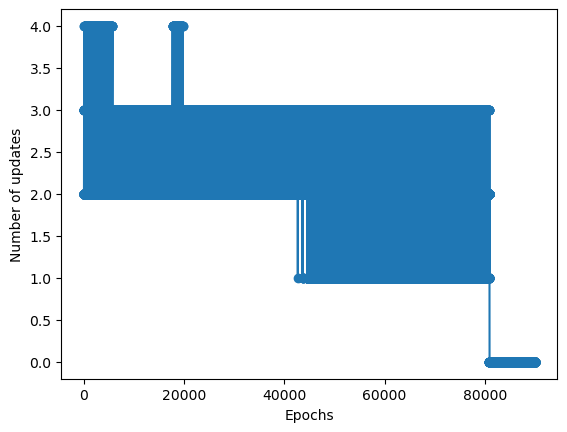

In [10]:
# train the perceptron algorithm on the data subset extracted
ppn = Perceptron(eta=0.1, n_iter=90000, random_state=1)

ppn.fit(X1, isLemon)

# plot the misclassification error for each epoch to check whether the algorithm converged
# and found a decision boundary that separates the two Iris flower classes
plt.plot(range(1, ppn.n_iter + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [11]:
# Check the misclassified samples

isLemon_pred = ppn.predict(X1)

print('Misclassified samples: %d' % (isLemon != isLemon_pred).sum())

Misclassified samples: 0
